#Import Data

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/HUmanmanNER/Tugas-Akhir-Mesin/main/TravelInsurancePrediction.csv")
data

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.shape

(1987, 9)

#Transformasi data

In [ ]:
data['Employment Type'] = data['Employment Type'].replace(to_replace=['Government Sector','Private Sector/Self Employed'], value=[0,1])
data['GraduateOrNot'] = data['GraduateOrNot'].replace(to_replace=['Yes','No'], value=[1,0])
data['FrequentFlyer'] = data['FrequentFlyer'].replace(to_replace=['Yes','No'], value=[1,0])
data['EverTravelledAbroad'] = data['EverTravelledAbroad'].replace(to_replace=['Yes','No'], value=[1,0])
data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


In [ ]:
data.dtypes

Age                    int64
Employment Type        int64
GraduateOrNot          int64
AnnualIncome           int64
FamilyMembers          int64
ChronicDiseases        int64
FrequentFlyer          int64
EverTravelledAbroad    int64
TravelInsurance        int64
dtype: object

['Age', 'Employment Type', 'AnnualIncome', 'FamilyMembers']


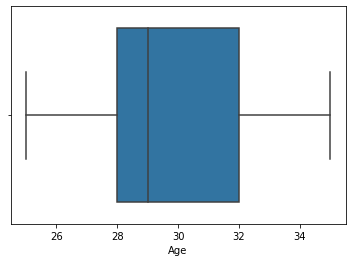

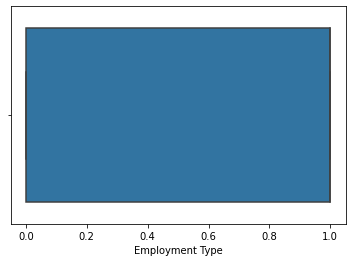

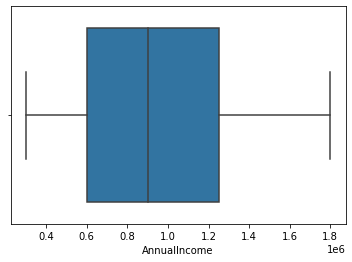

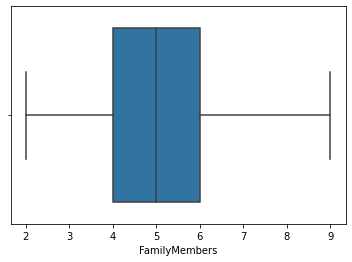

In [ ]:
#Deteksi outlier
import seaborn as sns
import matplotlib.pyplot as plt
col_num = ['Age','Employment Type','AnnualIncome','FamilyMembers']
print(col_num)
for i in col_num:
    sns.boxplot(x=pd.to_numeric(data[i]))
    plt.show()

Dari Deteksi Outlier, terlihat tidak ada outlier dalam kolom tersebut.

#Pemisahan data

In [ ]:
X = data.iloc[:,1:8]
y = data['TravelInsurance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

#Normalisasi data

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Kernel Linear

In [ ]:
# Finding the best hyperparameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=0.1, gamma=1)
classifier.fit(X=X_train, y=y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
y_pred = classifier.predict(X=X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Menampilkan hasil prediksi dalam bentuk tabel
hasil_klas=pd.DataFrame({'Kelas Asli':y_test,'Prediksi':y_pred})
hasil_klas.head()

,Kelas Asli,Prediksi
1291,1,1
1199,0,0
1756,1,0
107,0,1
655,0,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[831  66]
 [277 217]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       897
           1       0.77      0.44      0.56       494

    accuracy                           0.75      1391
   macro avg       0.76      0.68      0.69      1391
weighted avg       0.76      0.75      0.73      1391



In [ ]:
# fitted SVM model accuracy
accuracy_score(y_true=y_test, y_pred=y_pred)

0.7534148094895758

#Kernel RBF

In [ ]:
# Finding the best hyperparameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=1, gamma=1)
classifier.fit(X=X_train, y=y_train)

SVC(C=10, gamma=0.1)

In [ ]:
y_pred = classifier.predict(X=X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Menampilkan hasil prediksi dalam bentuk tabel
hasil_klas=pd.DataFrame({'Kelas Asli':y_test,'Prediksi':y_pred})
hasil_klas.head()

,Kelas Asli,Prediksi
1291,1,1
1199,0,0
1756,1,0
107,0,1
655,0,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[814  83]
 [260 234]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       897
           1       0.74      0.47      0.58       494

    accuracy                           0.75      1391
   macro avg       0.75      0.69      0.70      1391
weighted avg       0.75      0.75      0.74      1391



#Poly

In [ ]:
# Finding the best hyperparameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['poly']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 10, 'gamma': 1, 'kernel': 'poly'}


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', C=0.1, gamma=1)
classifier.fit(X=X_train, y=y_train)

SVC(C=0.1, gamma=1, kernel='poly')

In [ ]:
y_pred = classifier.predict(X=X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Menampilkan hasil prediksi dalam bentuk tabel
hasil_klas=pd.DataFrame({'Kelas Asli':y_test,'Prediksi':y_pred})
hasil_klas.head()

,Kelas Asli,Prediksi
1291,1,1
1199,0,0
1756,1,0
107,0,1
655,0,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[843  54]
 [276 218]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       897
           1       0.80      0.44      0.57       494

    accuracy                           0.76      1391
   macro avg       0.78      0.69      0.70      1391
weighted avg       0.77      0.76      0.74      1391



In [ ]:
# Finding the best hyperparameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['sigmoid']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid', C=1, gamma=0.1)
classifier.fit(X=X_train, y=y_train)

SVC(C=1, gamma=0.1, kernel='sigmoid')

In [ ]:
y_pred = classifier.predict(X=X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Menampilkan hasil prediksi dalam bentuk tabel
hasil_klas=pd.DataFrame({'Kelas Asli':y_test,'Prediksi':y_pred})
hasil_klas.head()

,Kelas Asli,Prediksi
1291,1,1
1199,0,0
1756,1,0
107,0,1
655,0,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[831  66]
 [277 217]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       897
           1       0.77      0.44      0.56       494

    accuracy                           0.75      1391
   macro avg       0.76      0.68      0.69      1391
weighted avg       0.76      0.75      0.73      1391



In [ ]:
# fitted SVM model accuracy
accuracy_score(y_true=y_test, y_pred=y_pred)

0.7534148094895758